In [155]:
import requests
import json
import time
from datetime import date
from datetime import datetime
from helpers.history_fetcher import HistoryFetcher
import dateutil.parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
### Introduction

Our project idea came from the observation that some wikipedia pages seems to get updated a lot after a related events happens. This could be observed during the Catalonia crisis that happened in september-october 2017. 

TODO must explain differences between initial plan and this plan.

The first step for our project was then to find strong evidence of the correlation between events and edits on wikipedia. To tackle this problem we decided to first take a special case: the 2014 Ukraine war. Our approach is to first show a visual argument (plots) for the correlation by doing the following steps: 

#### 1 - Find a dataset that contains events for the Ukraine war. 

The UCDP GED dataset is perfectly suited for this task as it contains all armed events that happen in Ukraine in 2014. 

#### 2 - Grab the history (i.e. edits) of Ukraine's wikipedia page.

In order to grab the edits history for any wikipedia page, we used wikipedia's API and abtracted it through our HistoryFetcher class. 

#### 3 - Plot the number of edits and events over time

This task was done using simple plots with matplotlib

---
### Importing UCDP GED dataset

In [157]:
ged_df = pd.read_excel('data/ged171.xlsx', header=0)

In [158]:
ukraine_ged_df = ged_df[ged_df['country']=='Ukraine']
cols_to_keep = ['dyad_name','date_start','date_end','deaths_a','deaths_b','deaths_civilians','deaths_unknown']
ukraine_ged_df = ukraine_ged_df[cols_to_keep]

#convert stinr to date
ukraine_ged_df['date_start'] = pd.to_datetime(ukraine_ged_df['date_start'])
# adding ukraine death all column
ukraine_ged_df['deaths all'] = ukraine_ged_df['deaths_a']+ukraine_ged_df['deaths_b']+ukraine_ged_df['deaths_civilians']+ukraine_ged_df['deaths_unknown']

In [159]:
ged_df.columns

Index(['id', 'year', 'active_year', 'type_of_violence', 'conflict_new_id',
       'conflict_name', 'dyad_new_id', 'dyad_name', 'side_a_new_id', 'gwnoa',
       'side_a', 'side_b_new_id', 'gwnob', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'source_headline',
       'source_original', 'where_prec', 'where_coordinates', 'adm_1', 'adm_2',
       'latitude', 'longitude', 'geom_wkt', 'priogrid_gid', 'country',
       'country_id', 'region', 'event_clarity', 'date_prec', 'date_start',
       'date_end', 'deaths_a', 'deaths_b', 'deaths_civilians',
       'deaths_unknown', 'best', 'low', 'high'],
      dtype='object')

In [162]:
ukraine_ged_df.head()

,dyad_name,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,deaths all
85031,Government of Ukraine - Maidan,2014-01-22,2014-01-22,0,5,0,0,5
85126,Government of Ukraine - Maidan,2014-01-27,2014-01-27,0,0,0,1,1
85140,Government of Ukraine - Maidan,2014-02-18,2014-02-18,10,4,0,12,26
85141,Government of Ukraine - Maidan,2014-02-18,2014-02-20,0,0,0,2,2
85142,Government of Ukraine - Maidan,2014-02-20,2014-02-20,2,46,0,0,48


---
### Fetching wikipedia's history

WIKI_URL = 'https://en.wikipedia.org/w/api.php'

In [213]:
history_fetcher = HistoryFetcher('Ukraine')
response = history_fetcher.get_history('20140101000000', '20161130000000')

In [214]:
dates = list(map(lambda revision: revision['timestamp'], response))
changes_size = list(map(lambda revision: revision['change_size'], response))

dates_events = ukraine_ged_df.date_start.values
deaths_all = ukraine_ged_df['deaths all'].values

In [201]:
ukraine_war_history_fetcher = HistoryFetcher('War in Donbass')
ukraine_war_response = history_fetcher.get_history('20140101000000', '20161130000000')

ukraine_war_dates = list(map(lambda revision: revision['timestamp'], ukraine_war_response))

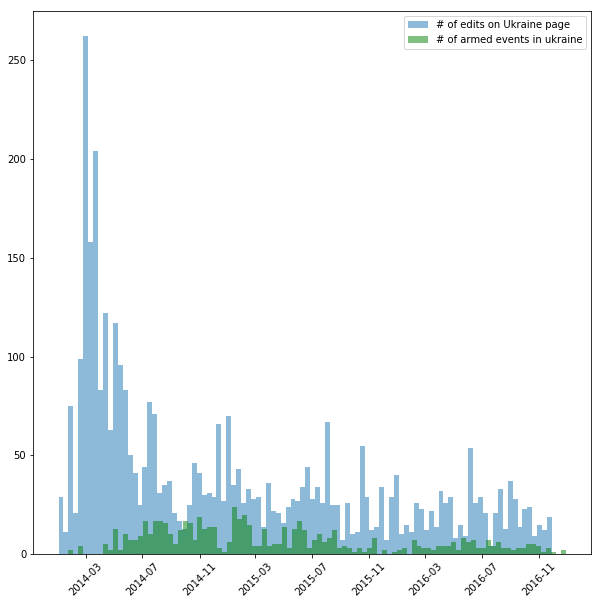

In [215]:
plt.hist(dates, bins=100, alpha=0.5, label='# of edits on Ukraine page')
#plt.hist(ukraine_war_dates, bins=100, alpha=0.5, color='grey', label='# of edits on Ukraine war page')
plt.hist(dates_events, bins=100, color='green', alpha=0.5, label='# of armed events in ukraine')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

In [218]:
france_history_fetcher = HistoryFetcher('France')
france_history = france_history_fetcher.get_history('20141201000000', '20160230000000')
france_dates = list(map(lambda revision: revision['timestamp'], france_history))

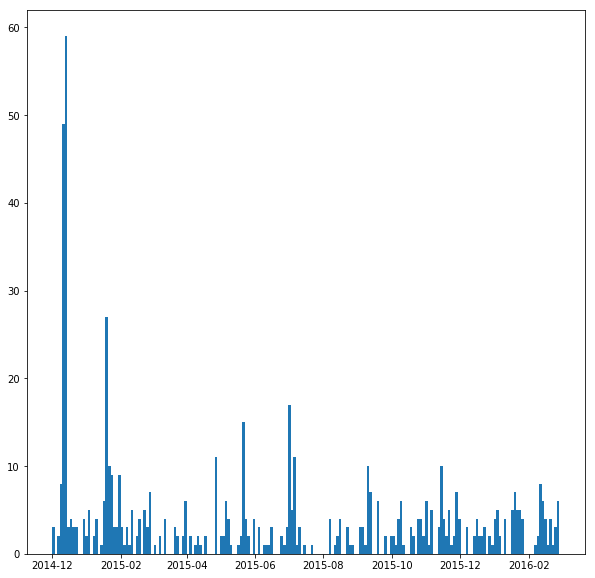

In [221]:
plt.hist(france_dates, bins=200)
plt.show()

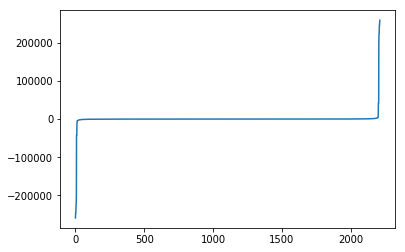

In [153]:
plt.plot(sorted(changes_size))
plt.show()

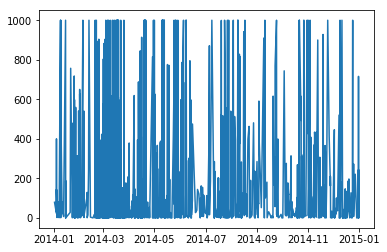

In [151]:
plt.plot(dates, list(map(lambda cs: max(min(abs(cs), 1000), -1000), changes_size)))
plt.show()

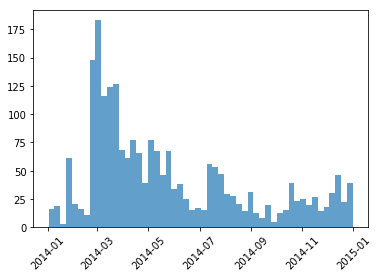

In [154]:
plt.hist(dates, bins=52, alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [135]:
catalonia_history_fetcher = HistoryFetcher('Catalonia')
catalonia_response = catalonia_history_fetcher.get_history('20170801000000', '20171120000000')
catalonia_dates = list(map(lambda revision: dateutil.parser.parse(revision['timestamp']), catalonia_response))

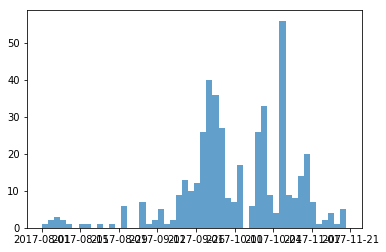

In [138]:
plt.hist(catalonia_dates, bins=50, alpha=0.7)
plt.show()

In [71]:
test2

[1, 2, 3]

In [217]:
len(response)

997

In [152]:
wikipage_title = 'Ukraine'

payload = {'action': 'query',
            'prop': 'revisions',
            'titles': wikipage_title,
            'rvprop': 'ids|flags|timestamp|comment|user|size',
          'format': 'json',
          'rvlimit': 500}

In [156]:
payload['rvstart'] = '2014-02-01T23:59:00Z'
payload['rvend'] = '2014-01-01T23:59:00Z'

response = requests.get(WIKI_URL, params=payload)

In [157]:
response

<Response [200]>

In [90]:
json.load(response.content)

AttributeError: 'bytes' object has no attribute 'read'

In [176]:
list(response.json()['query']['pages'].values())[0]['revisions']

[{'comment': '',
  'parentid': 593280510,
  'revid': 593427887,
  'size': 222598,
  'timestamp': '2014-02-01T13:12:04Z',
  'user': 'Anonymous from the 21st century'},
 {'comment': "[[Help:Reverting|Reverted]] 2 [[Wikipedia:Pending changes|pending]] edits by [[Special:Contributions/Red zenith|Red zenith]] to revision 593273696 by 217.76.1.22: Please provide an external source; don't just quote something and hide it in a ref tag",
  'parentid': 593275091,
  'revid': 593280510,
  'size': 222597,
  'timestamp': '2014-01-31T14:26:44Z',
  'user': 'ElHef'},
 {'comment': '/* Western Ukraine, Carpathian Ruthenia, Bukovina */',
  'minor': '',
  'parentid': 593274690,
  'revid': 593275091,
  'size': 223224,
  'timestamp': '2014-01-31T13:41:56Z',
  'user': 'Red zenith'},
 {'comment': '/* Western Ukraine, Carpathian Ruthenia, Bukovina */',
  'parentid': 593273696,
  'revid': 593274690,
  'size': 223247,
  'timestamp': '2014-01-31T13:38:40Z',
  'user': 'Red zenith'},
 {'anon': '',
  'comment': '',
 

In [158]:
response.json()

{'batchcomplete': '',
 'query': {'pages': {'31750': {'ns': 0,
    'pageid': 31750,
    'revisions': [{'comment': '',
      'parentid': 593280510,
      'revid': 593427887,
      'size': 222598,
      'timestamp': '2014-02-01T13:12:04Z',
      'user': 'Anonymous from the 21st century'},
     {'comment': "[[Help:Reverting|Reverted]] 2 [[Wikipedia:Pending changes|pending]] edits by [[Special:Contributions/Red zenith|Red zenith]] to revision 593273696 by 217.76.1.22: Please provide an external source; don't just quote something and hide it in a ref tag",
      'parentid': 593275091,
      'revid': 593280510,
      'size': 222597,
      'timestamp': '2014-01-31T14:26:44Z',
      'user': 'ElHef'},
     {'comment': '/* Western Ukraine, Carpathian Ruthenia, Bukovina */',
      'minor': '',
      'parentid': 593274690,
      'revid': 593275091,
      'size': 223224,
      'timestamp': '2014-01-31T13:41:56Z',
      'user': 'Red zenith'},
     {'comment': '/* Western Ukraine, Carpathian Ruthenia,

In [76]:
r2 = requests.get(WIKI_URL, params={'rvcontinue': "20120521201045|493714738"})

In [77]:
r2

<Response [200]>

In [ ]:
r2.content